# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [149]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [150]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [151]:
df = pd.DataFrame()
df['reviews'] = reviews
df.head()

,reviews
0,✅ Trip Verified | At 7.54 am on the day of tr...
1,✅ Trip Verified | Would happily fly them agai...
2,"Not Verified | Flew premium, only worth the e..."
3,✅ Trip Verified | First our morning flight wa...
4,✅ Trip Verified | Although it was a bit uncom...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Data Processing 

### Data Cleaning
- removing the parts before the | in the reviews colum

In [152]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
df.reviews 

0        At 7.54 am on the day of travel whilst drivi...
1        Would happily fly them again. I had a person...
2        Flew premium, only worth the extra money for...
3        First our morning flight was cancelled and m...
4        Although it was a bit uncomfortable flight i...
                             ...                        
995      Tokyo to Amsterdam via London. On the evenin...
996     Check-in at Vienna Airport was painless. BA u...
997     Took a day trip to Vienna with British Airway...
998      Glasgow to Heathrow. BA are a disgrace, it o...
999      London to Phoenix this week. Having a window...
Name: reviews, Length: 1000, dtype: object

### Rule-based approach 
This is a practical approach to analyzing text without training or usinga a ML model.
The result of this apprach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based apprach is called Lexicon based apprach. 

Widely used lexicon appraches are TextBlob, Vander, SentiWordNet

### Step 1: Cleaning the text

In [167]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df['Cleaned Reviews']

0       At am on the day of travel whilst driving to ...
1       Would happily fly them again I had a personal...
2       Flew premium only worth the extra money for t...
3       First our morning flight was cancelled and mo...
4       Although it was a bit uncomfortable flight in...
                             ...                        
995     Tokyo to Amsterdam via London On the evening ...
996     Check in at Vienna Airport was painless BA us...
997     Took a day trip to Vienna with British Airway...
998     Glasgow to Heathrow BA are a disgrace it once...
999     London to Phoenix this week Having a window s...
Name: Cleaned Reviews, Length: 1000, dtype: object

## Step 2: Tokenization 
Tokenization is the process of breaking the text into smaller piece called Tokens. It can be word tokenization (applied at word level) or sentence tokenization (sentence level). 
## Step 3: Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

## Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

## Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are **Stemming**  and **Lemmatization**.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

- NLTK is a leading platform for building Python programs to work with human language data. 

- It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
- with a suite 
of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [ ]:
import nltk 

"""This punktt togkenizer dvides a text into a list of sentences by using 
an unsupervised algorithm to build a model for abbreviation words, collocations
and words that start sentences"""

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

In [ ]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

In [181]:
new_df = df.drop(['Clean Reviews'], axis=1)
new_df

,reviews,Cleaned Reviews,POS tagged
0,At 7.54 am on the day of travel whilst drivi...,At am on the day of travel whilst driving to ...,"[(day, n), (travel, n), (whilst, n), (driving,..."
1,Would happily fly them again. I had a person...,Would happily fly them again I had a personal...,"[(Would, None), (happily, r), (fly, v), (perso..."
2,"Flew premium, only worth the extra money for...",Flew premium only worth the extra money for t...,"[(Flew, n), (premium, n), (worth, v), (extra, ..."
3,First our morning flight was cancelled and m...,First our morning flight was cancelled and mo...,"[(First, r), (morning, n), (flight, n), (cance..."
4,Although it was a bit uncomfortable flight i...,Although it was a bit uncomfortable flight in...,"[(Although, None), (bit, n), (uncomfortable, a..."
...,...,...,...
995,Tokyo to Amsterdam via London. On the evenin...,Tokyo to Amsterdam via London On the evening ...,"[(Tokyo, n), (Amsterdam, n), (via, None), (Lon..."
996,Check-in at Vienna Airport was painless. BA u...,Check in at Vienna Airport was painless BA us...,"[(Check, n), (Vienna, n), (Airport, n), (painl..."
997,Took a day trip to Vienna with British Airway...,Took a day trip to Vienna with British Airway...,"[(Took, v), (day, n), (trip, n), (Vienna, n), ..."
998,"Glasgow to Heathrow. BA are a disgrace, it o...",Glasgow to Heathrow BA are a disgrace it once...,"[(Glasgow, n), (Heathrow, n), (BA, n), (disgra..."


In [185]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

new_df['Lemma'] = new_df['POS tagged'].apply(lemmatize)
new_df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,At 7.54 am on the day of travel whilst drivi...,At am on the day of travel whilst driving to ...,"[(day, n), (travel, n), (whilst, n), (driving,...",day travel whilst drive London Heathrow rece...
1,Would happily fly them again. I had a person...,Would happily fly them again I had a personal...,"[(Would, None), (happily, r), (fly, v), (perso...",Would happily fly personal emergency allow r...
2,"Flew premium, only worth the extra money for...",Flew premium only worth the extra money for t...,"[(Flew, n), (premium, n), (worth, v), (extra, ...",Flew premium worth extra money bit extra roo...
3,First our morning flight was cancelled and m...,First our morning flight was cancelled and mo...,"[(First, r), (morning, n), (flight, n), (cance...",First morning flight cancel move afternoon f...
4,Although it was a bit uncomfortable flight i...,Although it was a bit uncomfortable flight in...,"[(Although, None), (bit, n), (uncomfortable, a...",Although bit uncomfortable flight economy fl...


In [186]:
new_df[['reviews', 'Lemma']]

,reviews,Lemma
0,At 7.54 am on the day of travel whilst drivi...,day travel whilst drive London Heathrow rece...
1,Would happily fly them again. I had a person...,Would happily fly personal emergency allow r...
2,"Flew premium, only worth the extra money for...",Flew premium worth extra money bit extra roo...
3,First our morning flight was cancelled and m...,First morning flight cancel move afternoon f...
4,Although it was a bit uncomfortable flight i...,Although bit uncomfortable flight economy fl...
...,...,...
995,Tokyo to Amsterdam via London. On the evenin...,Tokyo Amsterdam via London evening departure...
996,Check-in at Vienna Airport was painless. BA u...,Check Vienna Airport painless BA use Air Lou...
997,Took a day trip to Vienna with British Airway...,Took day trip Vienna British Airways book la...
998,"Glasgow to Heathrow. BA are a disgrace, it o...",Glasgow Heathrow BA disgrace stand high stan...


## Sentiment Analysis using VADER

**VADER** stands for Valence Aware Dictionary and Sentiment Reasoner
Vader sentiment not only tells if the statment is positive and negative along with the intensity of emotion

In [ ]:
! pip install vaderSentiment

In [190]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

#funtion calculate vader sentiment 
def vadersentimentanalysis(review):
    vs = analyser.polarity_scores(review)
    return vs['compound']

new_df['Sentiment'] = new_df['Lemma'].apply(vadersentimentanalysis)

#function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0: 
        return 'Negative'
    else:
        return 'Neutral'
new_df['Analysis'] = new_df['Sentiment'].apply(vader_analysis)
new_df.head()


,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,At 7.54 am on the day of travel whilst drivi...,At am on the day of travel whilst driving to ...,"[(day, n), (travel, n), (whilst, n), (driving,...",day travel whilst drive London Heathrow rece...,-0.6133,Negative
1,Would happily fly them again. I had a person...,Would happily fly them again I had a personal...,"[(Would, None), (happily, r), (fly, v), (perso...",Would happily fly personal emergency allow r...,0.9432,Positive
2,"Flew premium, only worth the extra money for...",Flew premium only worth the extra money for t...,"[(Flew, n), (premium, n), (worth, v), (extra, ...",Flew premium worth extra money bit extra roo...,0.1027,Neutral
3,First our morning flight was cancelled and m...,First our morning flight was cancelled and mo...,"[(First, r), (morning, n), (flight, n), (cance...",First morning flight cancel move afternoon f...,-0.7713,Negative
4,Although it was a bit uncomfortable flight i...,Although it was a bit uncomfortable flight in...,"[(Although, None), (bit, n), (uncomfortable, a...",Although bit uncomfortable flight economy fl...,0.6597,Positive


In [191]:
vader_counts = new_df['Analysis'].value_counts()
vader_counts

Positive    536
Negative    353
Neutral     111
Name: Analysis, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x285fd29f730>,
 [Text(-0.12414206920532624, 1.0929724363648976, 'Positive'),
  Text(-0.25678986018396566, -1.0696069220544058, 'Negative'),
  Text(1.2687461318934807, -0.4612843513553554, 'Neutral')],
 [Text(-0.06771385593017794, 0.5961667834717622, '53.6%'),
  Text(-0.14006719646398125, -0.5834219574842212, '35.3%'),
  Text(0.7988401571181173, -0.29043829529781634, '11.1%')])

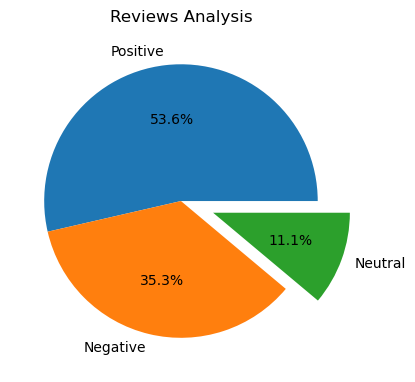

In [192]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title('Reviews Analysis')
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


In [193]:
new_df.to_csv("BA_reviews.csv")

## Wordcloud
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

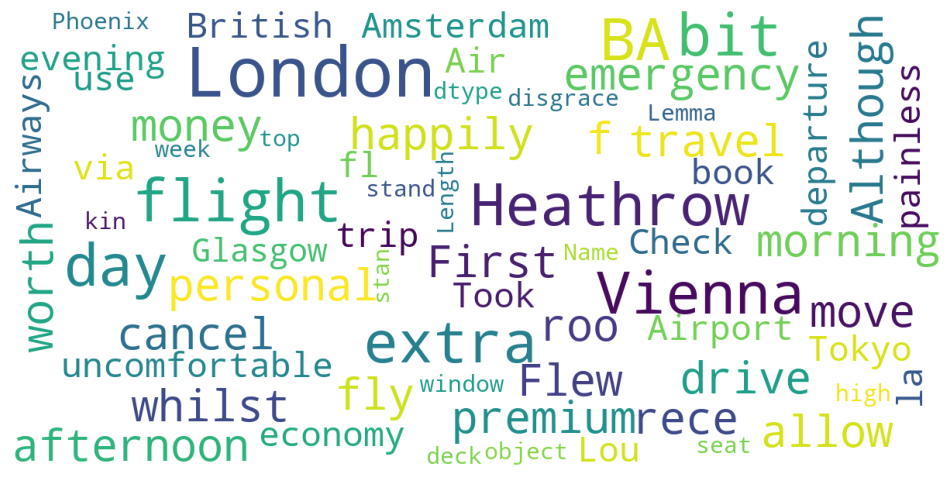

In [194]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)